<h1><center>
    ECE 438 - Laboratory 10<br/>
    Image Processing (Week 1)<br/>
    <small>Last Updated on April 15, 2022</small><br/>
    <br/>
    Date:4/20/2023<br/>
    Section:<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [Ruixiang Wang]| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Ability to process images with simple operations (15 pts)**: *Output images, question*||||
|**Understanding of pixel distribution and linear transformation (25 pts)**: *Output images, histograms, code(pointTrans), questions*||||
|**Understanding of gamma correction (15 pts)**: *Output image, code(gammCorr), questions*||||
|**Understanding of image smoothing and sharpening (45 pts)**: *Output images, codes(convolve2d, gaussFilter, medianFilter), frequency response, questions*||||

In [61]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


# refer to https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [62]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3 style="color:red;"><left>Exercise 2.1</left></h3>

**1. Load the image file ```yacht.tif```, which contains an $8$-bit monochrome image, using [`plt.imread()`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.imread.html).**

In [63]:
yacht = plt.imread("yacht.tif")


**2. Display the type of this variable by printing its attribute [`dtype`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.dtype.html).**

In [64]:
print(yacht.dtype)


uint8


**3. Create a double precision representation of the image. Display the type of the matrix.**

In [65]:
B = yacht.astype(float)
print(B.dtype)

float64


**4. Display ```yacht.tif``` using the following commands:**
```python
plt.imshow(B, cmap='gray', vmin=0, vmax=255)
plt.show()
```

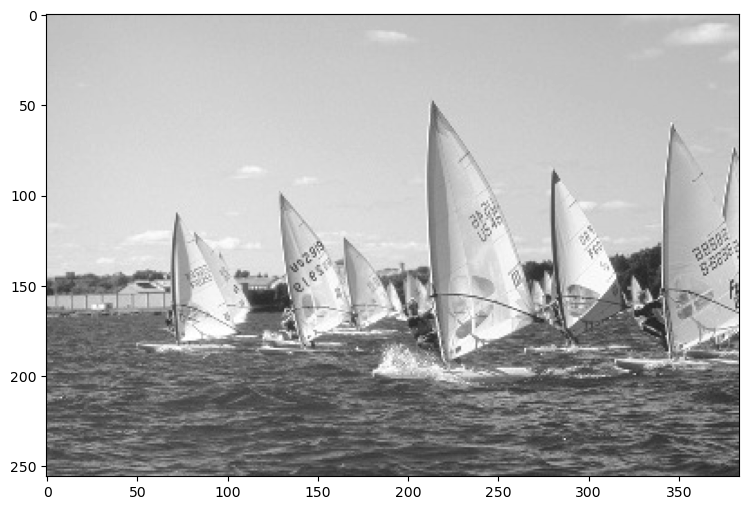

In [66]:
plt.imshow(B, cmap='gray', vmin=0, vmax=255)
plt.show()


**5. Print the value of $f[35, 79]$ for this `yacht.tif` image.**

In [67]:
print(B[35,79])

207.0


**6. Downsample this image by selecting every other row and column. Then, display it.**

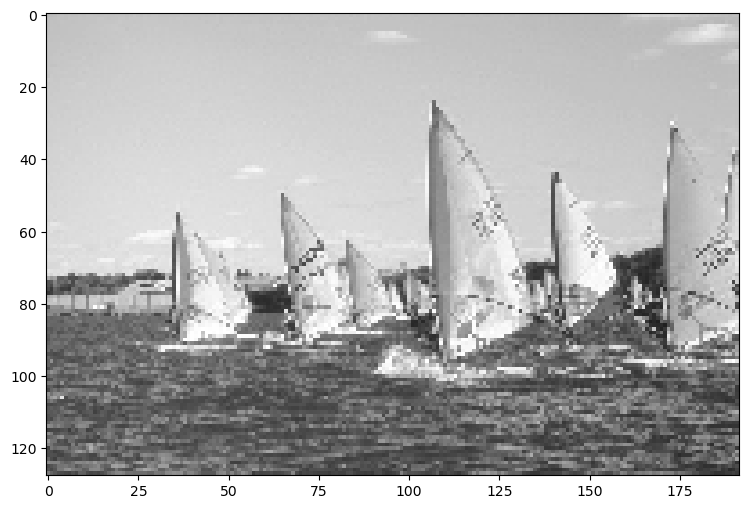

In [68]:
plt.imshow(B[::2,::2], cmap='gray', vmin=0, vmax=255)
plt.show()


**7.  Make a horizontally flipped version of the image by reversing the order of each column. Then, display it.**

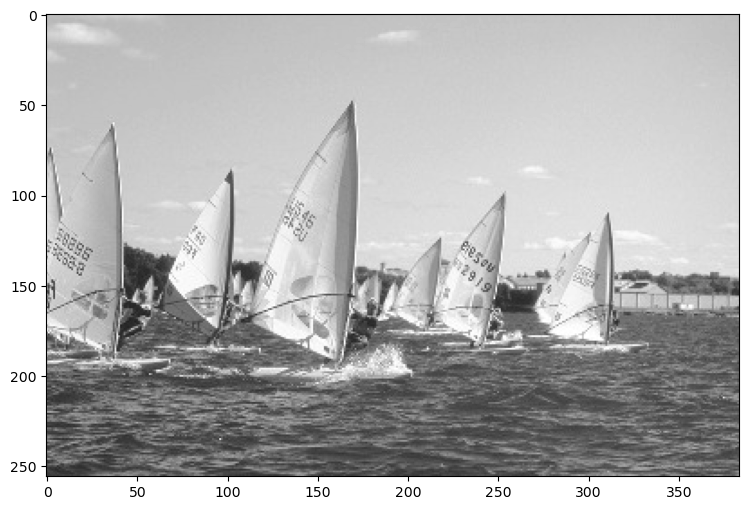

In [69]:
plt.imshow(np.fliplr(B), cmap='gray', vmin=0, vmax=255)
plt.show()


**8. Similarly, create a vertically flipped image. Display it.**

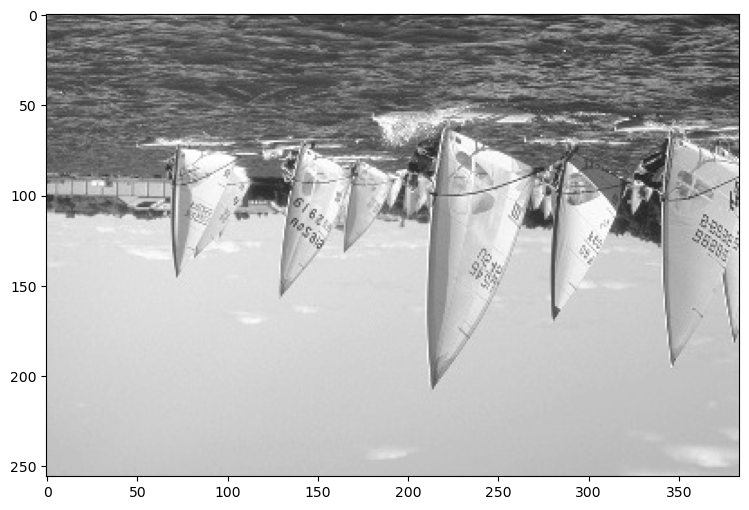

In [70]:
plt.imshow(np.flipud(B), cmap='gray', vmin=0, vmax=255)
plt.show()

**9. Create a “negative” of the image by subtracting each pixel from $255$. Then, display it.** 

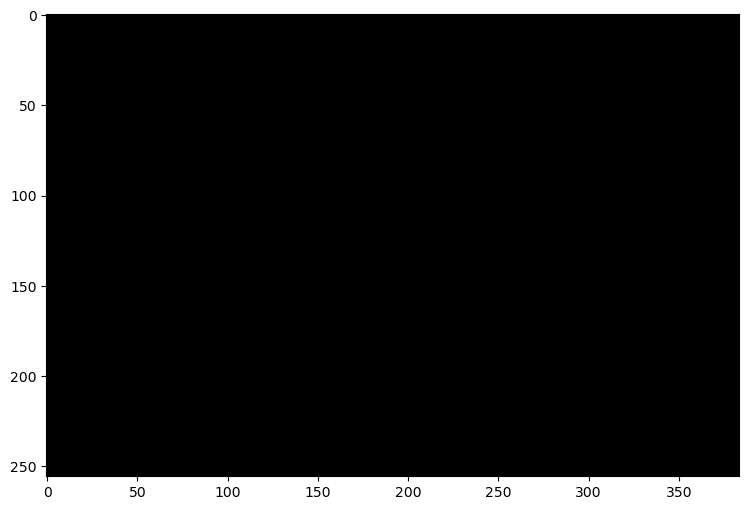

In [71]:
plt.imshow(B/255, cmap='gray', vmin=0, vmax=255)
plt.show()


**10. Multiply each pixel of the original image by $1.5$. Display it.**

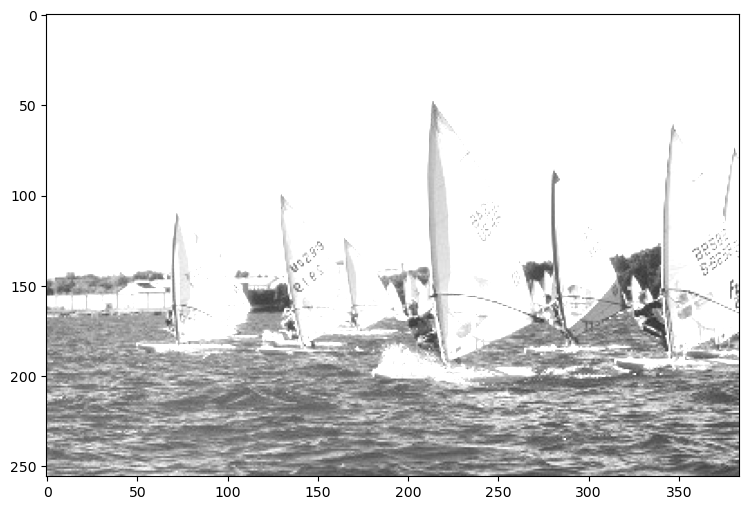

In [72]:
plt.imshow(B*1.5, cmap='gray', vmin=0, vmax=255)
plt.show()


**11.  What effect did multiplying each pixel of the original image by $1.5$ have?**

It brightened the image

<h3 style="color:red;"><left>Exercise 3.2: Histogram of an Image</left></h3>

**1. Load the grayscale image ```house.tif``` and display it.**

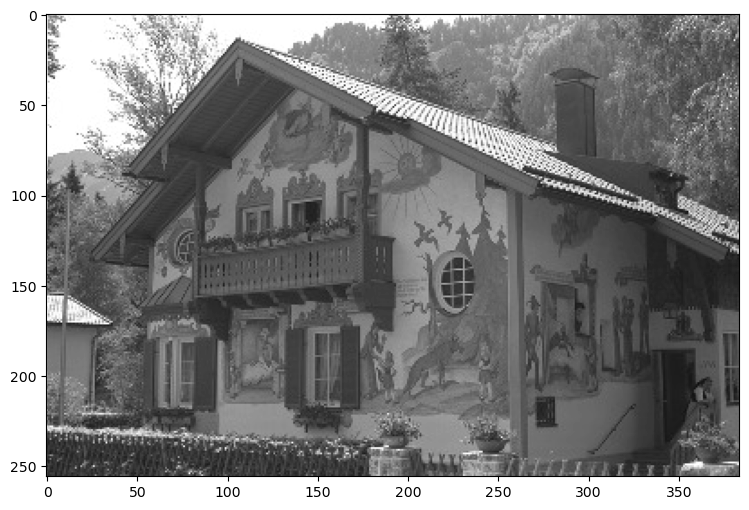

In [73]:
house = plt.imread("house.tif")
x = house.astype(float)
plt.imshow(x, cmap='gray', vmin=0, vmax=255)
plt.show()


**2. Plot the histogram of the image. Lable the axes of the histogram and give it a title.**

**Note**: You may use [`plt.hist()`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html) function. However, this function requires a vector as input. An example of using `plt.hist()` to plot a histogram of a matrix would be
```python
plt.hist(x.reshape(-1), bins=np.arange(256))  # reshape(-1) reshapes the original multi-dimension array to 1D
plt.title("title")
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.show()
```

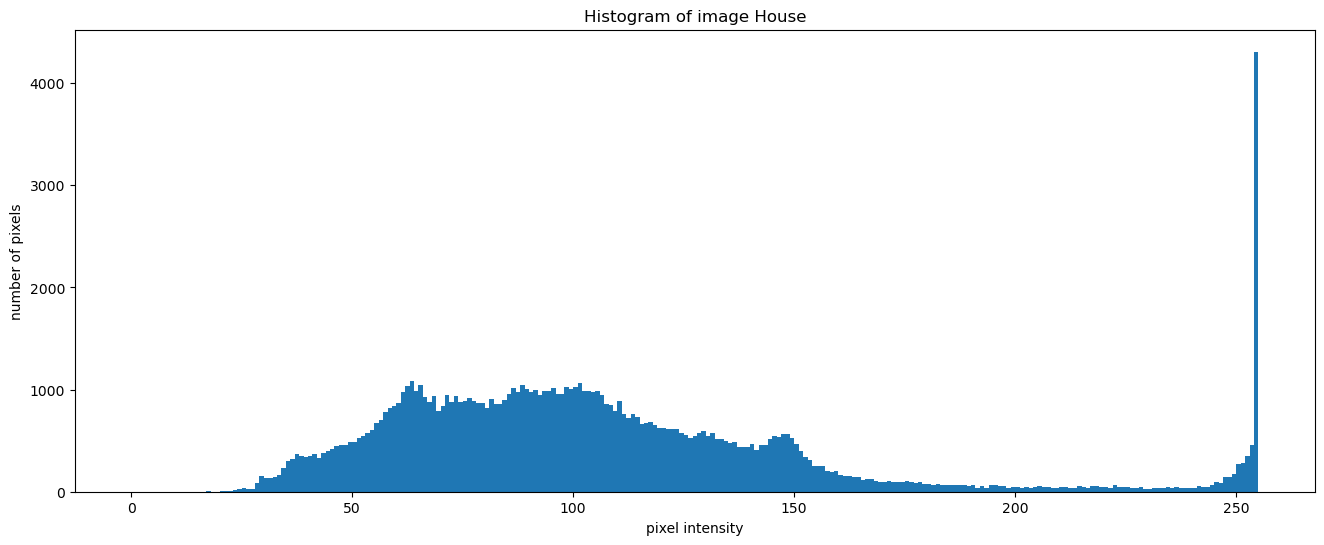

In [74]:
plt.hist(x.reshape(-1), bins=np.arange(256))  # reshape(-1) reshapes the original multi-dimension array to 1D
plt.title("Histogram of image House")
plt.xlabel("pixel intensity")
plt.ylabel("number of pixels")
plt.show()


<h3 style="color:red;"><left>Exercise 3.4: Pointwise Transformations</left></h3>

**1. Complete the function below that will perform the pixel transformation shown in Figure 3.**

**Hints:**
* Determine an equation for the graph in Fig. 3, and use this in your function. Notice you have three input regions to consider. You may want to create a separate function to apply this equation.
* If your function performs the transformation one pixel at a time, be sure to allocate the space for the output image at the beginning to speed things up.

In [75]:
def pointTrans(x, T1, T2):
    """
    Parameters
    ---
    x: the input
    T1: the lower threshold
    T2: the upper threshold
    
    Returns
    ---
    y: the output
    """
    
    row,col = np.shape(x)
    y = np.empty((row,col))
    for i in range(row):
        for j in range(col):
            if x[i,j] < T1:
                y[i,j] = 0
            elif x[i,j] > T2:
                y[i,j] = 255
            else:
                y[i,j] = (x[i,j] - T1)*255/(T2 - T1)
            
    return y

**2. Load the image file ```narrow.tif```. Display the image and its histogram.**

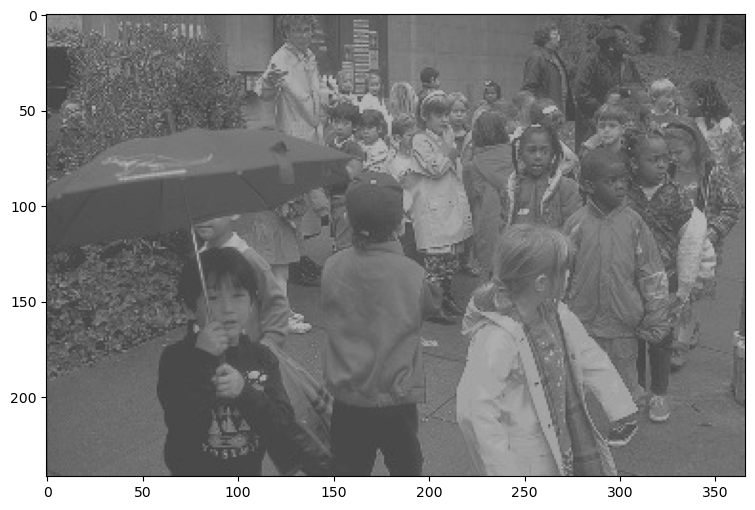

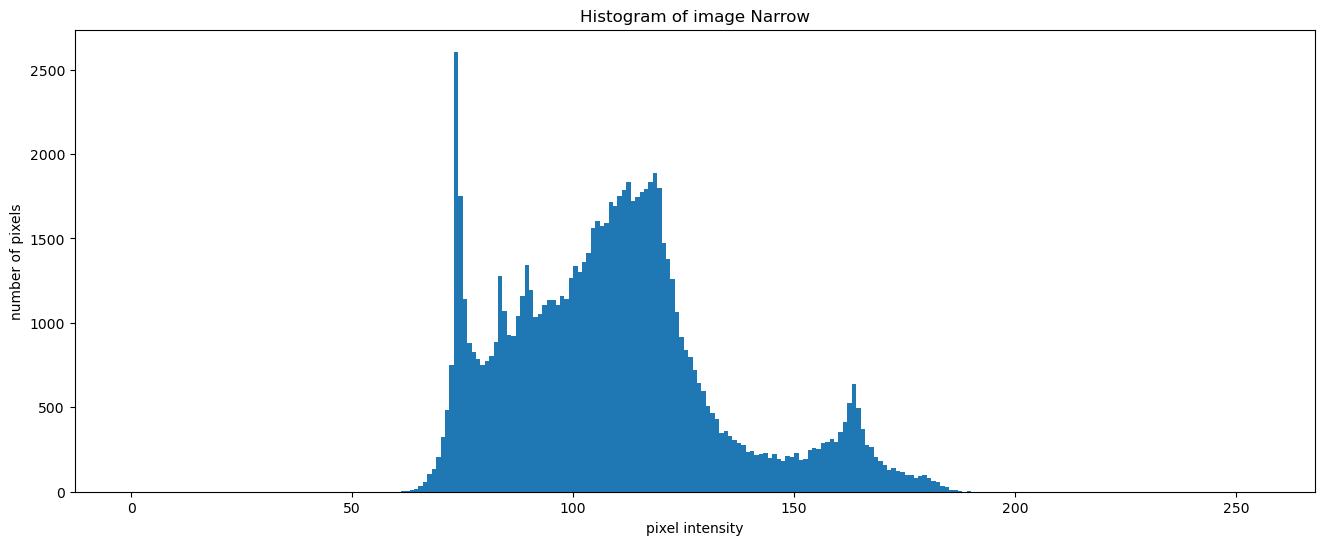

In [76]:
narrow = plt.imread("narrow.tif")
x = narrow.astype(float)
plt.imshow(x, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.hist(x.reshape(-1), bins=np.arange(256))  # reshape(-1) reshapes the original multi-dimension array to 1D
plt.title("Histogram of image Narrow")
plt.xlabel("pixel intensity")
plt.ylabel("number of pixels")
plt.show()

**3. Use your ```pointTrans()``` function to spread out the histogram using ```T1 = 70``` and ```T2 = 180```. Display the new image and its histogram.**

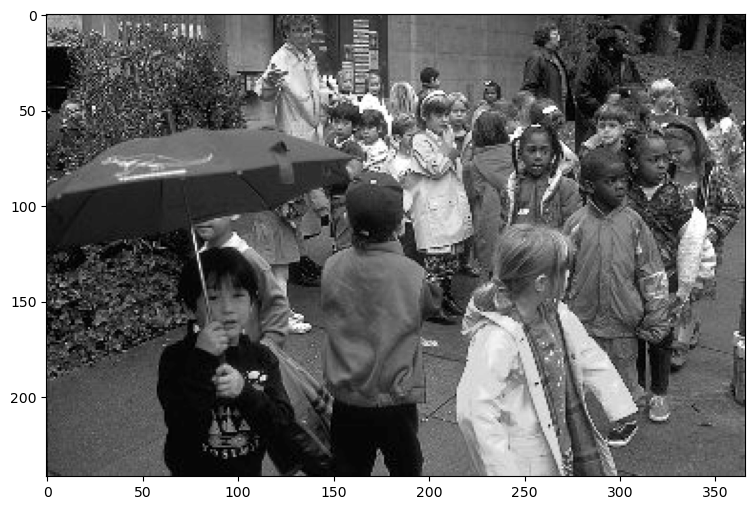

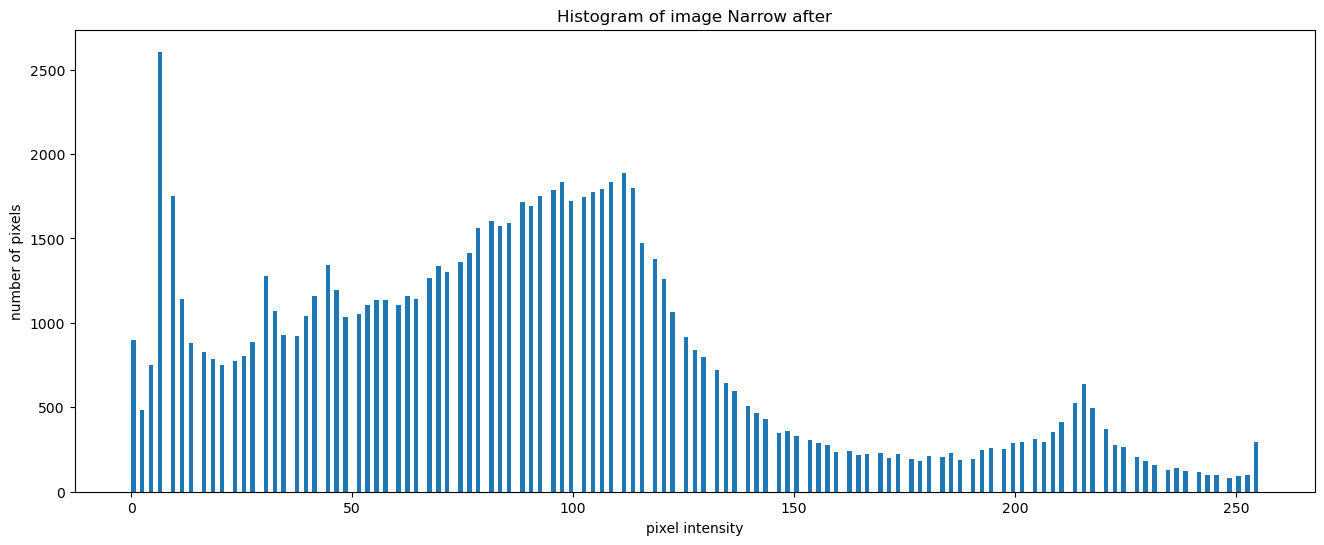

In [77]:
T1 = 70
T2 = 180
y = pointTrans(x,T1,T2)

plt.imshow(y, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.hist(y.reshape(-1), bins=np.arange(256))  # reshape(-1) reshapes the original multi-dimension array to 1D
plt.title("Histogram of image Narrow after")
plt.xlabel("pixel intensity")
plt.ylabel("number of pixels")
plt.show()

**4. What qualitative effect did the transformation have on the original image? Do you observe any negative effects of the transformation?**

The output looks brighter but there are white dots scattering around.

**5. Compare the histograms of the original and transformed images. Why are there zeros in the output histogram?**

The output histogram is more spead out. There are zeros because it's same data spreading out, thus leaving no data fall into those values.

<h3 style="color:red;"><left>Exercise 4.1: Gamma($\gamma$) Correction</left></h3>

**1. Complete the function below that will $\gamma$ correct an image by applying the inverse of equation (5).**

In [78]:
def gammCorr(A, gamma):
    """
    Parameters
    ---
    A: the uncorrected image
    gamma: the gamma of the device
    
    Returns
    ---
    the corrected image
    """
    
    B = (A/255)**(1/gamma)*255
    return B

**2. Load the image file ```dark.tif```, which is an image that has not been $\gamma$ corrected for your monitor. Display it and observe the quality of the image.**

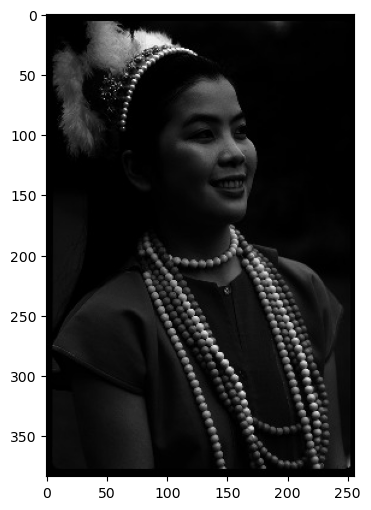

In [79]:
dark = plt.imread("dark.tif")
x = dark.astype(float)
plt.imshow(x, cmap='gray', vmin=0, vmax=255)
plt.show()


**3. Assume that the $\gamma$ for your monitor is $2.2$. Use your ```gammCorr()``` function to correct the
image for your monitor, and display the resultant image.**

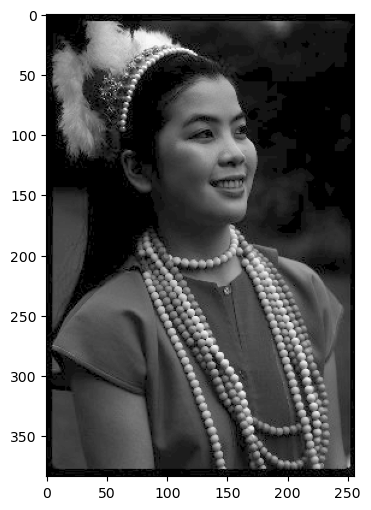

In [80]:
gamma = 2.2
B = gammCorr(x, gamma)
plt.imshow(B, cmap='gray', vmin=0, vmax=255)
plt.show()

**4. How did the correction affect the image? Does this appear to be the correct value for $\gamma$?**

The brightness seems more nature. It appears to be the correct value.

<h3 style="color:red;"><left>Exercise 5.1: 2D Convolution</left></h3>

Filters can be represented as a 2-D convolution of an image $f[i, j]$ with the filter’s impulse response $h[i, j]$.

\begin{align*}
    g[i,j]&=f[i,j]**h[i,j]\tag{6}\\
    &=\sum_{k=-\infty}^{\infty}\sum_{l=-\infty}^{\infty}f[i-k,j-l]h[k,l]
\end{align*}

**1. Complete the function below to convolve the image `image` with the filter `kernel`. Use zero padding to make sure the size of the image is unchanged after it being filtered.**

* Assume that the size of the kernel is $s\times s$ where $s$ is odd.
* Try avoid using *for* loops in Equation 6. This can be done by flipping the kernel horizontally and vertically first, and then using element-wise multiplication of matrices and `np.sum()`.
* To zero pad the image, create a new matrix of zeros. The size of this matrix should be $(H+s-1)\times(W+s-1)$, where $H$, $W$ are the height and the width of the original image, and $s$ is the size of the kernel. Then, assign the correct sub-region of the new matrix with the image.

In [81]:
def convolve2d(image, kernel):
    """
    Parameters
    ---
    image: the input image
    kernel: the filter
    
    Returns
    ---
    filtered: the filtered image
    """
    
    H,W = np.shape(image)
    s = len(kernel)
    filtered = np.zeros((H,W))
    new = np.zeros((H+s-1,W+s-1))
    
    for i in range(H):
        for j in range(W):
            new[i+s//2,j+s//2] = image[i,j]
        
    h = np.flip(kernel)
    
    for k in range(H):
        for l in range(W):
            filtered[k,l] = np.sum((new[k:k+s,l:l+s]*h))
    
    return filtered

**2. Run the following cell to get the test input image and a $3\times3$ filter. Use your `convolve2d()` function to get the filtered image.**

In [82]:
image = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]).astype(float)
kernel = np.array([[-1/8, 1/2, -1/8],
                   [-1/4, 1.0, -1/4],
                   [-1/8, 1/2, -1/8]])

In [83]:
filtered = convolve2d(image, kernel)


**3. Run the following cell to check if your `convolve2d()` is correct.**

In [84]:
filtered_correct = np.array([[0, 0, 0, 0, -1/8, 1/2, -1/8, 0, 0, 0, 0],
                             [0, 0, 0, -1/8, 1/8, 10/8, 1/8, -1/8, 0, 0, 0],
                             [0, 0, -1/8, 1/8, 7/8, 10/8, 7/8, 1/8, -1/8, 0, 0],
                             [0, -1/8, 1/8, 7/8, 9/8, 1, 9/8, 7/8, 1/8, -1/8, 0],
                             [-1/8, 1/8, 7/8, 9/8, 1, 1, 1, 9/8, 7/8, 1/8, -1/8],
                             [-3/8, 1, 9/8, 1, 1, 1, 1, 1, 9/8, 1, -3/8],
                             [-1/2, 3/2, 1, 1, 1, 1, 1, 1, 1, 3/2, -1/2],
                             [-1/2, 3/2, 1, 1, 1, 1, 1, 1, 1, 3/2, -1/2],
                             [-1/2, 3/2, 1, 1, 1, 1, 1, 1, 1, 3/2, -1/2],
                             [-3/8, 9/8, 6/8, 6/8, 6/8, 6/8, 6/8, 6/8, 6/8, 9/8, -3/8],
                             [-1/8, 3/8, 2/8, 2/8, 2/8, 2/8, 2/8, 2/8, 2/8, 3/8, -1/8]])

np.testing.assert_allclose(filtered, filtered_correct, atol=1e-10, rtol=1e-10)

<h3 style="color:red;"><left>Exercise 5.3: Image Smoothing</left></h3>

**1. Complete the function below that will create a normalized Gaussian filter that is centered around the origin (the center element of your matrix should be $h[0, 0]$).**

* Note that this filter is both separable and symmetric, meaning $h[i, j] = h[i]h[j]$ and $h[i] = h[−i]$.
* Notice that for this filter to be symmetrically centered around zero, `N` will need to be an odd number.
* Make sure the sum of the filter coefficient magnitudes is $1$.

In [85]:
def gaussFilter(N, var):
    """
    Parameters
    ---
    N: the size of filter
    var: the variance
    
    Returns
    ---
    h: the NxN filter
    """
    h = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            h[i,j] = np.exp(-(i**2+j**2)/(2*var))
    C = np.sum(h)
    
    h = h/C
    return h

**2. Compute the frequency response of a $7\times7$ Gaussian filter with $\sigma^2=1$.**

* You may use the following command to get a $32\times32$ DFT.
```python
H = np.fft.fftshift(np.fft.fft2(h, (32, 32)))
```

In [86]:
N = 7
var = 1
h = gaussFilter(N, var)
H = np.fft.fftshift(np.fft.fft2(h, (32, 32)))


**3. Plot the magnitude of the frequency response of the Gaussian filter, $|H_{\text{Gauss}}(\omega_1,\omega_2)|$, using the provided ```mesh_plot()``` function below. Plot it over the region $[-\pi,\pi]\times[-\pi,\pi]$, and label the axes.**

In [87]:
# refer to https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html

def mesh_plot(X, Y, Z, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=2, antialiased=True)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

C:\Users\rxw14\AppData\Local\Temp\ipykernel_6348\238945766.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


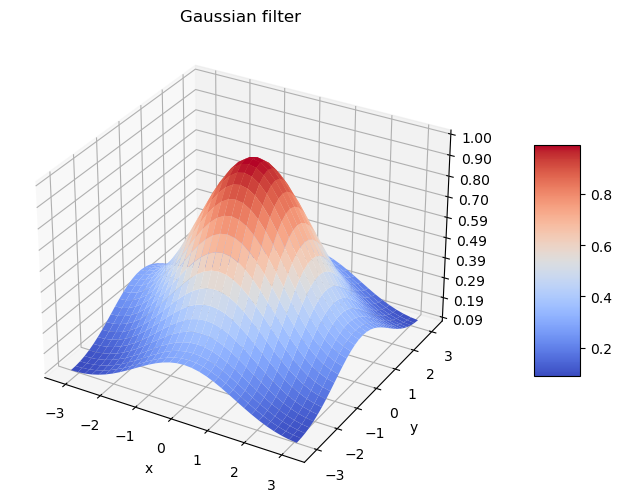

In [88]:
X = np.linspace(-np.pi,np.pi,32)
Y = np.linspace(-np.pi,np.pi,32)
x,y = np.meshgrid(X,Y)
mesh_plot(x,y,np.abs(H),"Gaussian filter","x","y")


**4. Load the image file ```race.tif``` and filter it with a $7\times7$ Gaussian filter, with $\sigma^2=1$. Display the original and the filtered images.**

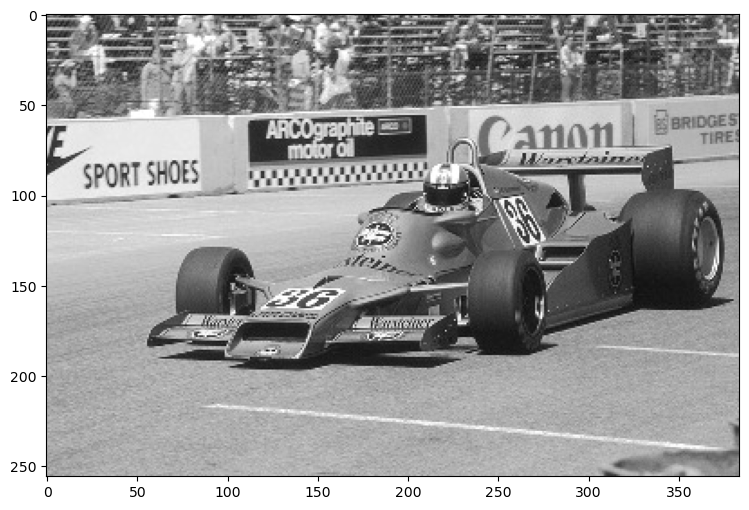

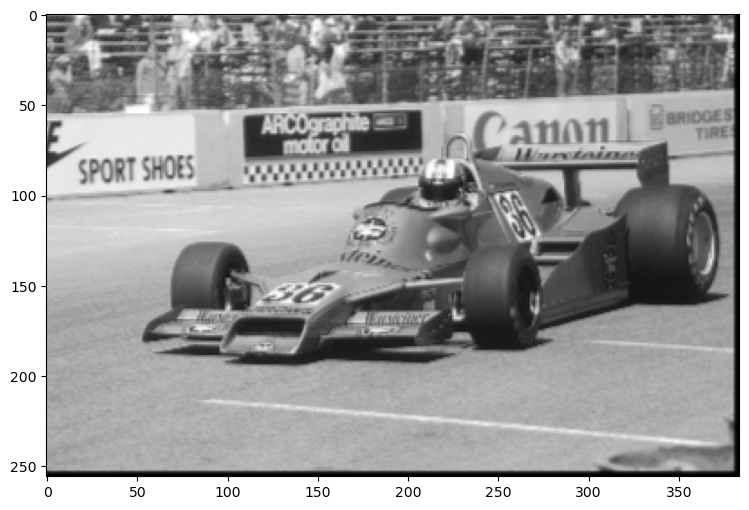

In [89]:
race = plt.imread("race.tif")
race1 = race.astype(float)
N = 7
var = 1
h = gaussFilter(N, var)

plt.imshow(race1, cmap='gray', vmin=0, vmax=255)
plt.show()

result = convolve2d(race1,h)
plt.imshow(result, cmap='gray', vmin=0, vmax=255)
plt.show()

**5. Load the image files ```noise1.tif``` and ```noise2.tif```, and display them. These images are versions of `race.tif` that have been degraded by additive white Gaussian noise and “salt and pepper” noise, respectively.**

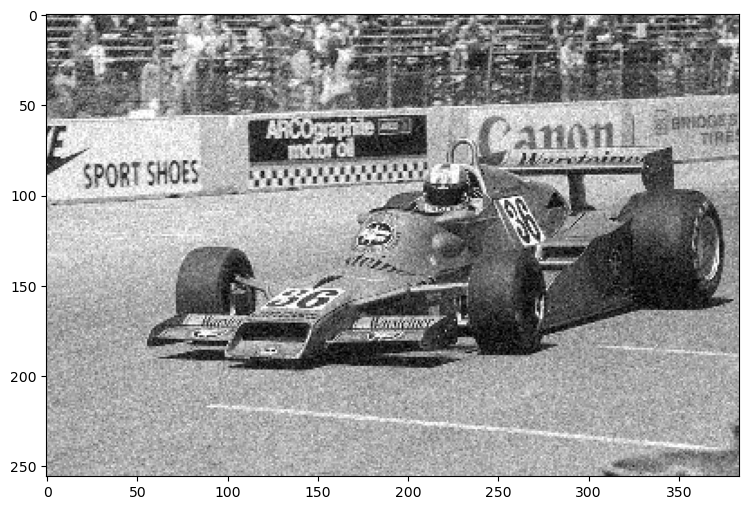

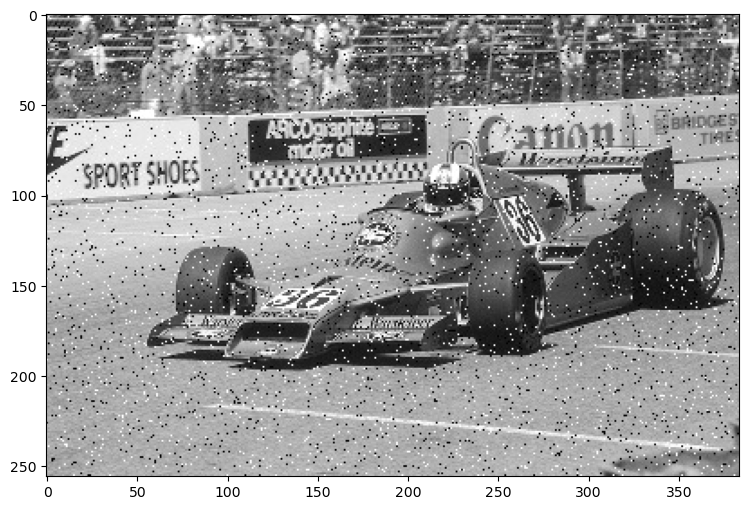

In [90]:
noise1 = plt.imread("noise1.tif")
noise11 = noise1.astype(float)

plt.imshow(noise11, cmap='gray', vmin=0, vmax=255)
plt.show()

noise2 = plt.imread("noise2.tif")
noise22 = noise2.astype(float)

plt.imshow(noise22, cmap='gray', vmin=0, vmax=255)
plt.show()

**6. Complete the function below to implement a $3\times3$ median filter (without using the ```signal.medfilt2d()``` function).**

* For convenience, you do not have to alter the pixels on the border of `image`.
* Use ```np.median()``` to find the median value of a subarea of the image, i.e., a $3\times3$ window surrounding each pixel.

In [91]:
def medianFilter(image):
    """
    Parameters
    ---
    image: the input image
    
    Returns
    ---
    filtered: the output filtered image
    """
    H,W = np.shape(image)
    filtered = np.zeros((H,W))
    for i in range(1,H-1):
        for j in range(1,W-1):
            neighborhood = image[i-1:i+2,j-1:j+2]
            filtered[i,j] = np.median(neighborhood)
    return filtered

**7. Filter each of the noisy images with both the $7 \times 7$ Gaussian filter ($\sigma^2 = 1$) and the $3 \times 3$ median filter. Display the 4 results and place a title indicating the type of noise and the filter on each image.**

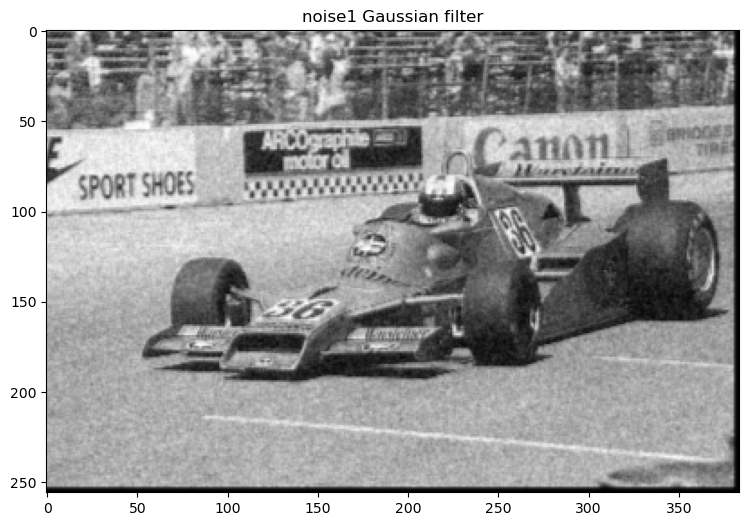

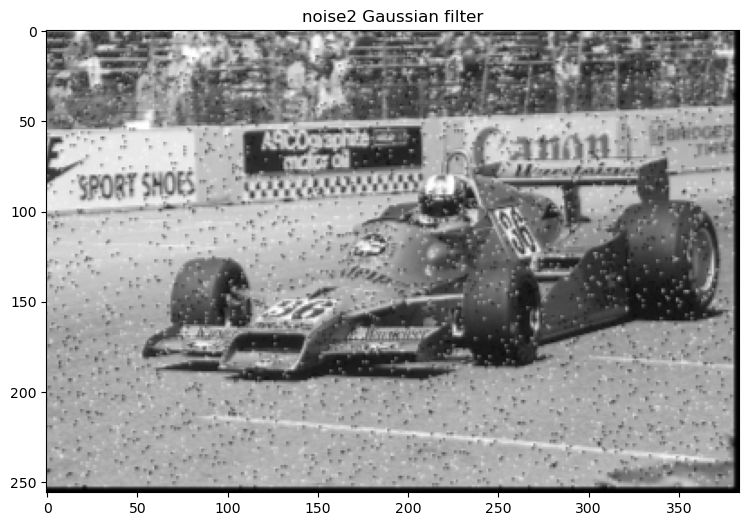

In [92]:
N = 7
var = 1
h = gaussFilter(N, var)

result_noise1 = convolve2d(noise11,h)
plt.imshow(result_noise1, cmap='gray', vmin=0, vmax=255)
plt.title("noise1 Gaussian filter")
plt.show()

result_noise2 = convolve2d(noise22,h)
plt.imshow(result_noise2, cmap='gray', vmin=0, vmax=255)
plt.title("noise2 Gaussian filter")
plt.show()

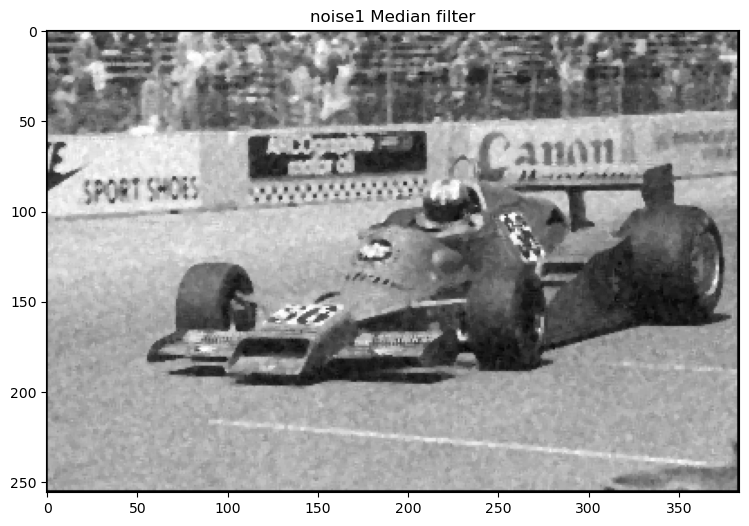

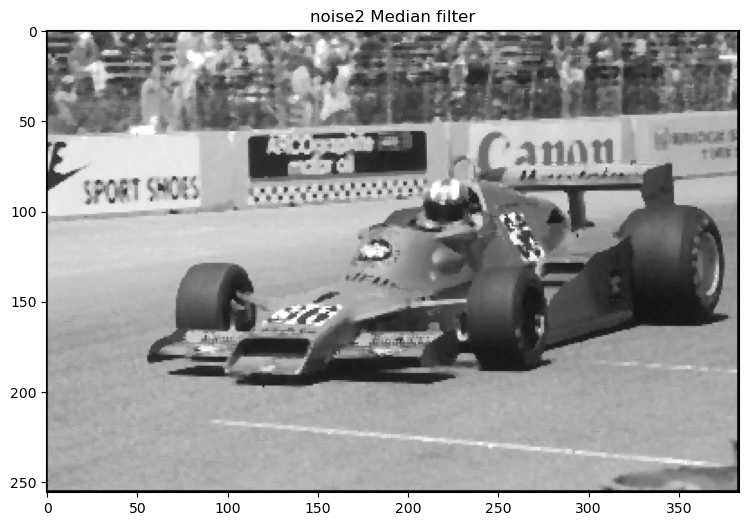

In [93]:
filtered_noise11 = medianFilter(noise11)
plt.imshow(filtered_noise11, cmap='gray', vmin=0, vmax=255)
plt.title("noise1 Median filter")
plt.show()

filtered_noise22 = medianFilter(noise22)
plt.imshow(filtered_noise22, cmap='gray', vmin=0, vmax=255)
plt.title("noise2 Median filter")
plt.show()

**8. Discuss the effectiveness of each filter for the case of additive white Gaussian noise. Discuss both positive and negative effects that you observe for each filter.**

For gaussian noise the gaussian filter looks better for it soften the image. The median filter makes it even worse by having blurry result.

**9. Discuss the effectiveness of each filter for the case of “salt & pepper” noise. Again, discuss both positive and negative effects that you observe for each filter.**

The gaussian filter seems to work fine on gaussian noise but do little on salt and pepper noise. The median filter works better on salt and pepper noise for the noise seems disappeared.

<h3 style="color:red;"><left>5.5. Exercise: Image Sharpening</left></h3>

**1. Using your ```gaussFilter()``` function, create a $5 \times 5$ Gaussian filter with $\sigma^2 = 1$.**

In [94]:
N = 5
var = 1
h = gaussFilter(N, var)


**2. Derive the frequency response of an unsharp mask filter from equation (10).**

G/F = alpha-beta*H

**3. Compute the frequency response of the unsharp mask filter, using the Gaussian filter as $h[i, j]$, $\alpha = 5$ and $\beta = 4$. The size of the calculated frequency response should be $32 \times 32$. Plot the magnitude of this response in the range $[-\pi, \pi] \times [-\pi, \pi]$ using provided function ```mesh_plot()```, and label the axes. Print out this response.**

C:\Users\rxw14\AppData\Local\Temp\ipykernel_6348\238945766.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


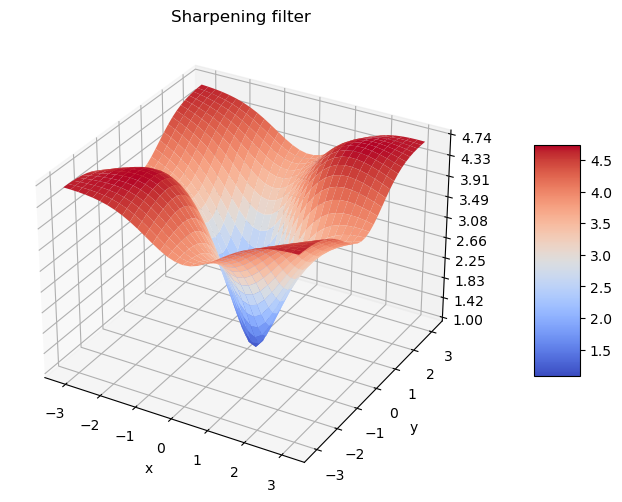

In [95]:
H = np.fft.fftshift(np.fft.fft2(h, (32, 32)))
Freq_response = 5 - 4 * H
X = np.linspace(-np.pi,np.pi,32)
Y = np.linspace(-np.pi,np.pi,32)
x,y = np.meshgrid(X,Y)
mesh_plot(x,y,np.abs(Freq_response),"Sharpening filter","x","y")

**4. Load the image file ```blur.tif``` and display it.**

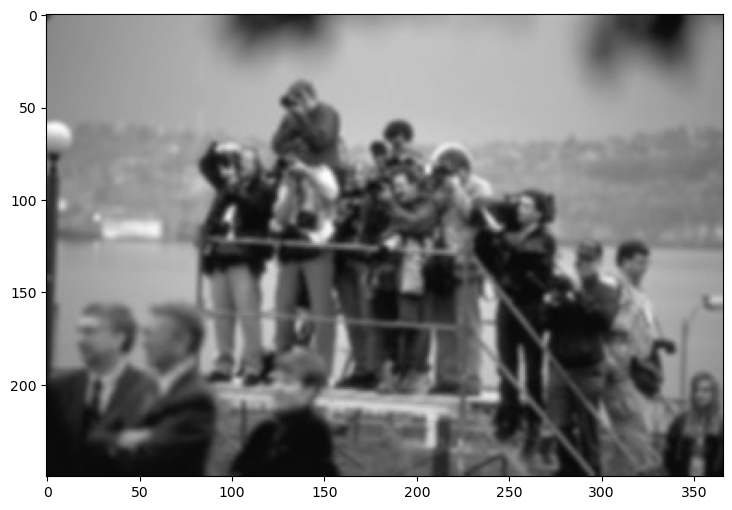

In [96]:
blur = plt.imread("blur.tif")
blur1 = blur.astype(float)

plt.imshow(blur1, cmap='gray', vmin=0, vmax=255)
plt.show()


**5. Apply the unsharp mask filter with the parameters specified above to this image, using equation (9). Use $\alpha = 5$ and $\beta = 4$ to display the filtered image.**

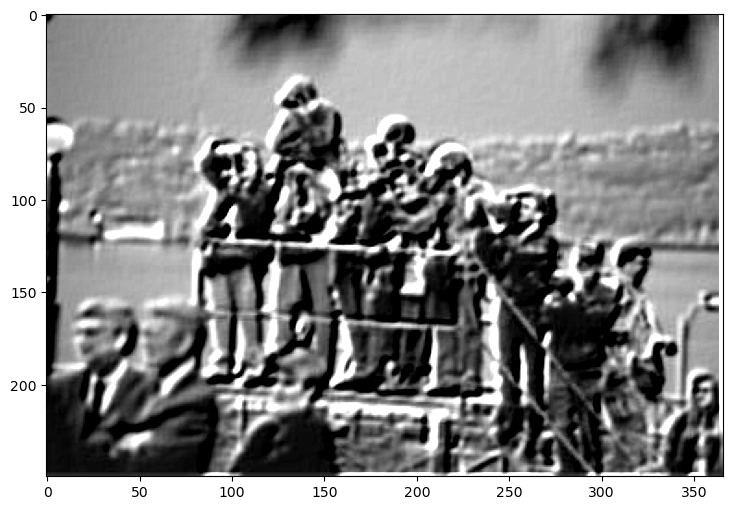

In [97]:
g = 5*blur1 - 4*convolve2d(blur1,h)
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.show()


**6. What effect did the filtering have on the image?**

The black and white are seperated and sharpened, making it looks like an oil paint.

**7. Now try applying the filter to ```blur.tif```, using $\alpha = 10$ and $\beta = 9$. Label the processed image and display it.**

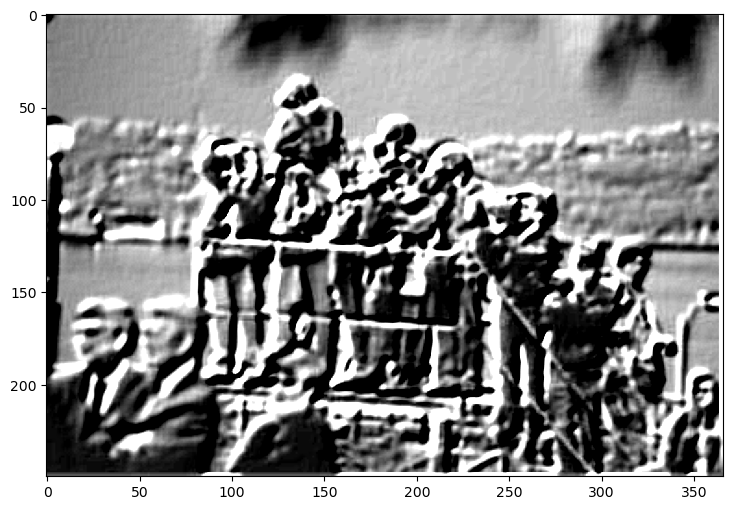

In [98]:
g = 10*blur1 - 9*convolve2d(blur1,h)
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.show()


**8. Compare this result to the previous one.**

It got worse.